<a href="https://colab.research.google.com/github/maybe-surf/MAP-3305-Engineering-math/blob/main/Analog_Computer_IVP_ODE_Euler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as math

In [2]:
import matplotlib.pyplot as plot

In [ ]:
# %%capture
# !pip install git+https://github.com/williamedwardhahn/mpcr
# from mpcr import *

In [13]:
def matprint(matrix, fmt="g"):
  """
  prints out a matrix 
  """
  col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in matrix.T]
  for x in matrix:
      for i, y in enumerate(x):
          print(("{:"+str(col_maxes[i])+fmt+"}").format(y), end="  ")
      print("")

<img src="https://cdn1.byjus.com/wp-content/uploads/2018/11/maths/2016/06/03060820/Differential-Equation.jpg">

# Exponential Growth & Exponential Decay

In [3]:
def x_prime(x):
    return 0.1*x #value of the derivative

In [4]:
x = 100
time0 = 0 #Starting Time
timeF = 60 #Final Stopping Time
dt = 0.001 # Time Step Size
num_steps = int((timeF-time0)/dt)
num_steps

60000

In [5]:
X = math.zeros(num_steps,)

In [6]:
for i in range(num_steps):

    x = x + x_prime(x)*dt #approximates the value of a function at a point using its derivative 

    X[i] = x

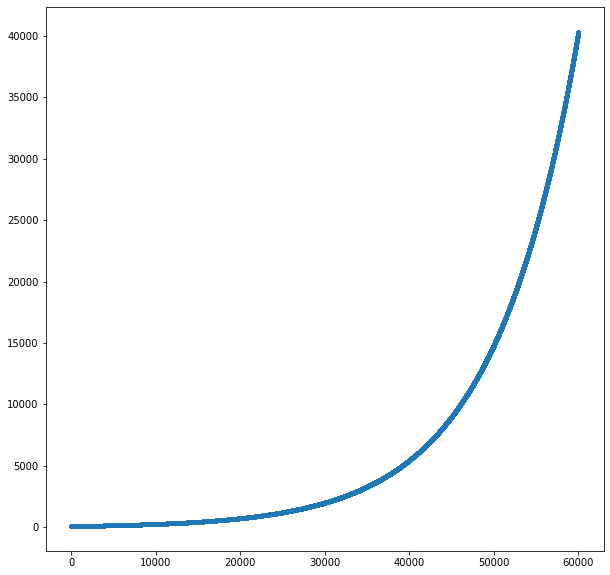

In [7]:
plot.figure(figsize=(10,10))
plot.plot(X,'.');

In [8]:
def x_prime_2(x,t):
    return -0.1*x

In [9]:
x = 100
t = 0
dt = 0.001
n = 100000
X = math.zeros(n,)

In [10]:
for j in range(n):

    x = x + x_prime_2(x,t)*dt #approximates the value of a function

    X[j] = x #stores the values in a vector

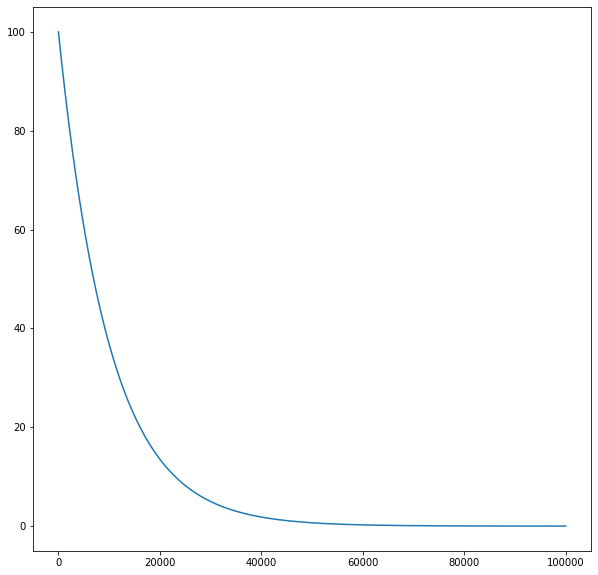

In [11]:
plot.figure(figsize=(10,10))
plot.plot(X);

# Matrix Version Damped Harmonic Oscillator

In [40]:
syst = math.array([[0,1],[-2,-0.1]]) #initialize a matrix for the system

In [41]:
matprint(syst)

 0     1  
-2  -0.1  


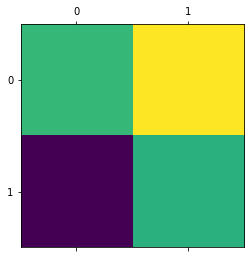

In [30]:
plot.matshow(syst)

In [46]:
def deriv(x_vals,t):
    return syst @ x_vals #multiplies hte matrix by the vector to get the value of a derivative at a point

In [47]:
dim = 2
x_vals = math.array([0,1]) #initial state of the system

t_initial  = 0
t_final = 50
dt = 0.001

num_steps = int((t_final-t_initial)/dt)

X = math.zeros((num_steps,dim))

In [48]:
for i in range(num_steps):

    x_vals = x_vals + deriv(x_vals,t_initial)*dt 

    X[i] = x_vals

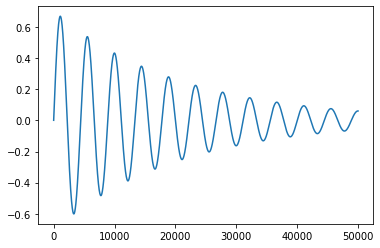

In [49]:
plot.plot(X[:, 0]);

# Matrix Version Predator-Prey System

In [50]:
def derivative(x,t): #defines the derivative of th system
    return math.array([
                      alpha*x[0]  - beta*x[0]*x[1],
                                   delta*x[0]*x[1] - gamma*x[1]  
    ])

In [51]:
dimension = 2
x_vals = math.zeros(dimension,)

x_vals[0] = 10
x_vals[1] = 10

t_init  = 0
t_final = 50
dt = 0.001

num_steps = int((t_final-t_init)/dt)
X = math.zeros((num_steps,dimension))

In [52]:
alpha = 1 
beta = 0.05 
delta = 0.02
gamma = 0.5

In [54]:
for i in range(num_steps):

    x_vals = x_vals + derivative(x_vals,t_init)*dt #uses Euler's method to store the approximate values of X

    X[i] = x_vals

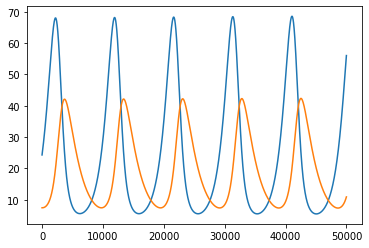

In [55]:
plot.plot(X)

# Matrix Lorenz System

$\frac{dx}{dt}=\sigma(y-x)$

$\frac{dy}{dt}=x(p-z)-y$

$\frac{dz}{dt}=xy-\beta z$

In [56]:
rho = 28.0
sigma = 10.0
beta = 8.0 / 3.0

In [64]:
matrix = math.array([[-sigma,sigma,0,0,0],[rho,-1,0,0,-1],[0,0,-beta,1,0]]) #sets up the matrix for the system

In [65]:
matprint(matrix)

-10  10         0  0   0  
 28  -1         0  0  -1  
  0   0  -2.66667  1   0  


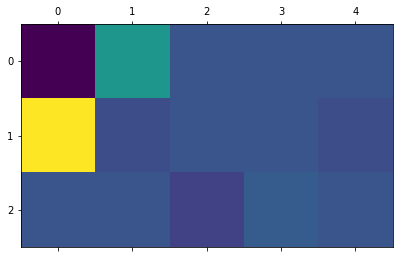

In [66]:
plot.matshow(matrix)

In [67]:
def deriv(x, t):
    x, y, z = x
    state = math.array([x,y,z,x*y,x*z])
    return matrix @ state 

In [61]:
d = 3
x = math.array([1,1,1])

t  = 0
tf = 50
dt = 0.001

n = int((tf-t)/dt)
X = math.zeros((n,d))

In [68]:
for j in range(n):

    x = x + deriv(x,t)*dt

    X[j] = x

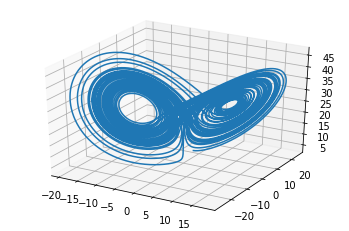

In [69]:
fig = plot.figure()
ax = fig.gca(projection="3d")
ax.plot(X[:, 0], X[:, 1], X[:, 2]);